In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import dct

sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
import random
from functools import reduce
from sklearn.mixture import GaussianMixture
import sklearn
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# sample_rate = 48000
# Given .wav file, extract MFCC features with default 
def extractMFCC(filename, sample_rate, mels, nmfccs):
    #sample_rate = 192000
    utter_part, sr = librosa.core.load(filename, sample_rate)  # load utterance audio
    # intervals = librosa.effects.split(utter_part, top_db=30)  # voice activity detection
    # print(intervals)
    S_total = []

    S = librosa.core.stft(y=utter_part)
    S = np.abs(S) ** 2
    # print("Size of S is {}".format(S.shape))
    mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=2048, n_mels=mels)
    S = np.log10(np.dot(mel_basis, S) + 1e-6)

    # plt.show()
    # plt.pause(2)
    # Extract MFCC feature
    # mfccs = librosa.feature.mfcc(y=utter_part.astype('float'), sr=sample_rate, n_mfcc=10)
    # S_total = np.concatenate(S_total,axis=1)
    # print(S_total.shape)
    mfccs = librosa.feature.mfcc(S = S, sr=sample_rate, n_mfcc=nmfccs) # (128, times)
    # print(mfccs.shape)
    print("Shape of mfcc features is {}".format(mfccs.shape))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='frames', hop_length=58)
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    mfccs = mfccs.reshape(-1,10)
    return mfccs

In [3]:
dataset = [dirs for dirs in os.listdir('.') if(dirs[-4:]==("-low"))]
dataset

['hanqing-low', 'jianzhi-low', 'liuli-low', 'Nick-low', 'xiao-low']

In [4]:
fricative_path = os.path.join('.', dataset[0],'1.wav')

Shape of mfcc features is (10, 188)


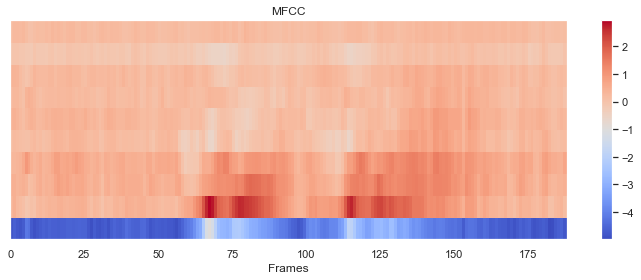

In [5]:
mfcc1 = extractMFCC(fricative_path,48000,mels=10, nmfccs=10)

Shape of mfcc features is (10, 188)


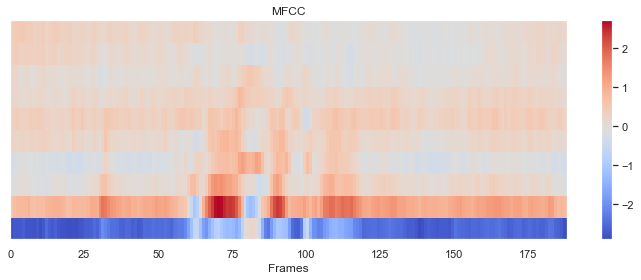

In [6]:
fricative_path = os.path.join('.', dataset[0],'2.wav')
mfcc2 = extractMFCC(fricative_path,48000,mels=10, nmfccs=10)

Shape of mfcc features is (10, 188)


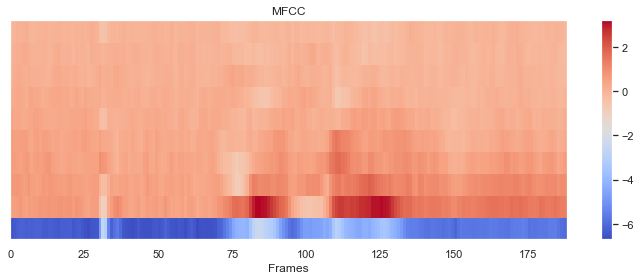

In [7]:
fricative_path = os.path.join('.', dataset[0],'3.wav')
mfcc3 = extractMFCC(fricative_path,48000,mels=10, nmfccs=10)

Shape of mfcc features is (10, 188)


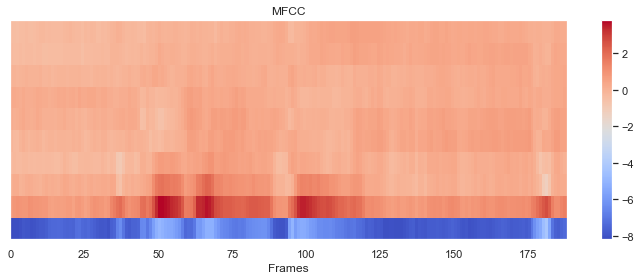

In [8]:
fricative_path = os.path.join('.', dataset[0],'4.wav')
mfcc4 = extractMFCC(fricative_path,48000,mels=10, nmfccs=10)

(10, 188)


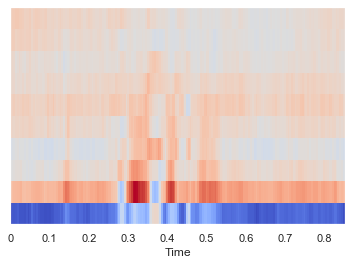

In [9]:
mfcc2.shape
fricative = mfcc2[0:200,:]
fricative = fricative.reshape(10,-1)
print(fricative.shape)
librosa.display.specshow(fricative, x_axis='time',hop_length=100)

In [10]:
X = mfcc2
Y = mfcc3
print(mfcc2.shape)
sim = cosine_similarity(X, Y, dense_output=True)
print(sim.shape)
fricative = mfcc2[65:70,:]
print(fricative.shape)

(188, 10)
(188, 188)
(5, 10)


In [11]:
752/20

37.6

In [12]:
fricative = fricative.reshape(-1,50)
sumv = 0
for i in range(round(188/5)-1):
    selected = mfcc3[i*5:(i+1)*5, :]
    selected = selected.reshape(-1,50)
    print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    print(sim.shape)
    sumv = sumv + sim[0][0]
    if(sim[0][0] > 0.8):
        print(i, i*5, sim)
print(sumv)

(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
(1, 50)
(1, 1)
8.285454516299069


Shape of mfcc features is (10, 188)
4.530430051963776


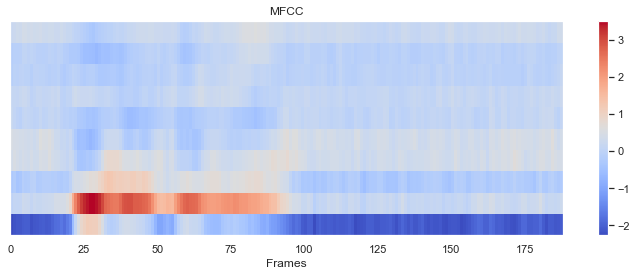

In [204]:
fricative_path = os.path.join('.', dataset[2],'1.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,48000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(188/5)-1):
    selected = jianzhi_mfcc1[i*5:(i+1)*5, :]
    selected = selected.reshape(-1,50)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    # print(sim)
    sumv = sumv + sim[0][0]
    if(sim[0][0] > 0.8):
        print(i, i*5, sim)
print(sumv)

In [100]:
sumv = 0
for i in range(round(752/20)-1):
    selected = mfcc4[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
    #print(i, i*20, sim)
print(sumv)    

14 280 [[0.97549397]]
18 360 [[0.96177775]]
19.79231222718954


Shape of mfcc features is (10, 752)


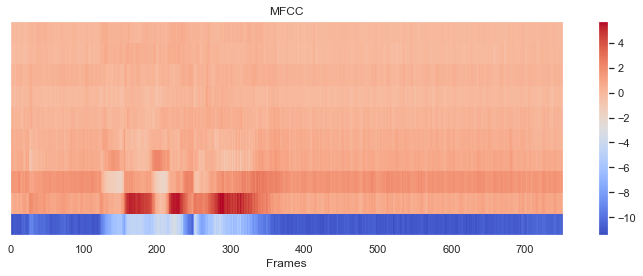

In [101]:
fricative_path = os.path.join('.', dataset[1],'2.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)

In [102]:
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
    #print(i, i*20, sim)
print(sumv) 

9 180 [[0.9550102]]
10 200 [[0.9617028]]
14 280 [[0.9508319]]
16.992195837199688


Shape of mfcc features is (10, 752)
4 80 [[0.95072806]]
8 160 [[0.9573874]]
10 200 [[0.957507]]
15.052391096949577


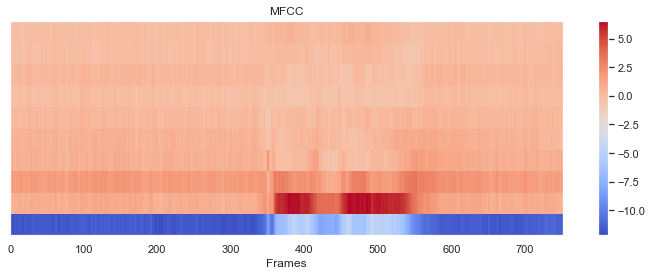

In [103]:
fricative_path = os.path.join('.', dataset[1],'1.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
print(sumv) 

Shape of mfcc features is (10, 752)
9 180 [[0.9764752]]
10 200 [[0.95919967]]
17.714487124234438


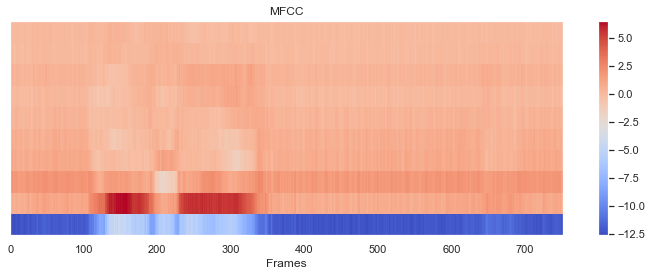

In [104]:
fricative_path = os.path.join('.', dataset[1],'3.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
    #print(i, i*20, sim)
print(sumv) 

Shape of mfcc features is (10, 752)
10 200 [[0.95926017]]
15.780127219855785


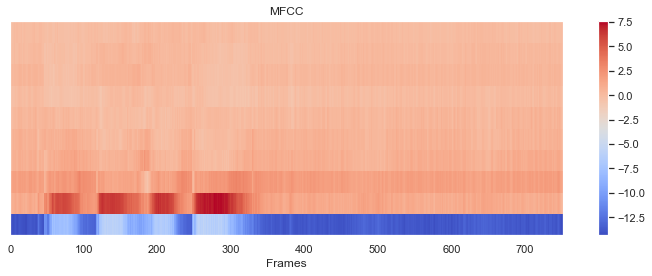

In [105]:
fricative_path = os.path.join('.', dataset[1],'4.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
print(sumv) 

Shape of mfcc features is (10, 752)
6 120 [[0.9553195]]
10 200 [[0.96114165]]
14 280 [[0.96808153]]
29 580 [[0.96294487]]
18.324757158756256


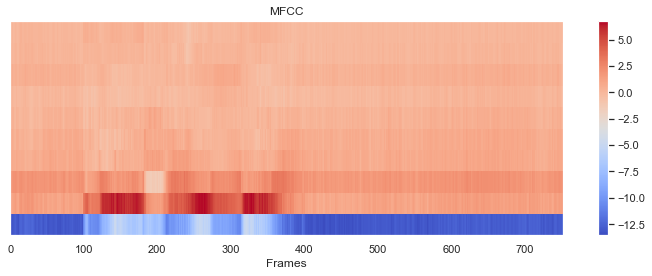

In [106]:
fricative_path = os.path.join('.', dataset[1],'5.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
print(sumv) 

Shape of mfcc features is (10, 752)
10 200 [[0.96585566]]
21.45435430854559


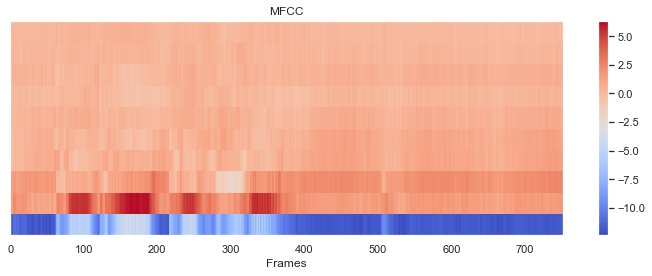

In [107]:
fricative_path = os.path.join('.', dataset[1],'6.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
print(sumv) 

Shape of mfcc features is (10, 752)
14 280 [[0.97549397]]
18 360 [[0.96177775]]
19.79231222718954


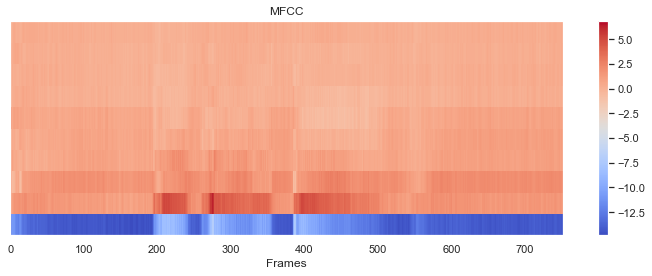

In [148]:
fricative_path = os.path.join('.', dataset[0],'4.wav')
jianzhi_mfcc1 = extractMFCC(fricative_path,192000,mels=10, nmfccs=10)
sumv = 0
for i in range(round(752/20)-1):
    selected = jianzhi_mfcc1[i*20:(i+1)*20, :]
    selected = selected.reshape(-1,200)
    # print(selected.shape)
    sim = cosine_similarity(fricative, selected, dense_output=True)
    if(sim[0][0] > 0.95):
        print(i, i*20, sim)
    sumv = sumv + sim[0][0]
print(sumv) 

In [108]:
import librosa

In [119]:
melfb = librosa.filters.mel(44000, 2048)

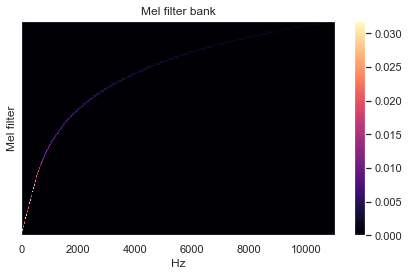

In [120]:
import matplotlib.pyplot as plt
plt.figure()
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()

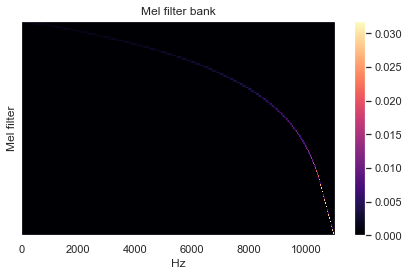

In [121]:
import matplotlib.pyplot as plt
plt.figure()
librosa.display.specshow(np.fliplr(melfb), x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()

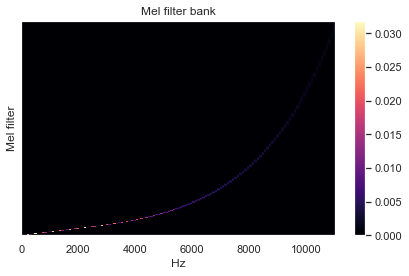

In [116]:
import matplotlib.pyplot as plt
plt.figure()
librosa.display.specshow(melfb.T, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()

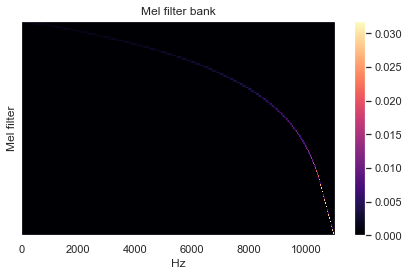

In [118]:
import matplotlib.pyplot as plt
plt.figure()
librosa.display.specshow(np.fliplr(melfb), x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()